# In March of 2019 there were floods in South Dakota, USA
![](https://theintercept.imgix.net/wp-uploads/sites/1/2019/04/h_15196312-Pipeline-Flooding-1554474495-e1554474625282.jpg?auto=compress%2Cformat&q=90&fit=crop&w=1440&h=720)

> Image source: <a src=https://theintercept.com/2019/04/05/keystone-xl-pipeline-pine-ridge-floods/> The Intercept April 5, 2019</a>

In March 2019, large parts of South Dakota were flooded for weeks. What happened to cause this flooding? What impacts did the flooding have? Before we look at data about the flooding, we need to check out what other sources are saying about it.

&#128214; Here are some resources from different sources to get you started:
  * [The National Weather Service](https://www.weather.gov/unr/2019-05-26_31) 
  * [South Dakota Public Radio](https://listen.sdpb.org/news/2019-10-17cheyenne-river-tribe-says-oahe-dam-has-caused-problems-for-decades)
  * [The Intercept](https://theintercept.com/2019/04/05/keystone-xl-pipeline-pine-ridge-floods/)

&#128172; If you or someone you know have experience with this site, or 
were there during the floods, we also invite you to write about that.


## The Cheyenne River near Wasta, SD was one of the locations affected by the flooding

To start, you'll be focusing on the Cheyenne River, which flows into 
Lake Oahu. Then, you'll pick your own site that was affected by a flood.

### Site Description

&#9998; In the cell below, describe the Cheyenne River area in a few sentences. 
You can include:
  * Information about the **climatology** of the area, or typical 
  precipitation and temperature at different months of the year
  * The **runoff ratio** (average annual runoff divided by average 
  annual precipitation)
  * Which **wildlife and ecosystems** exist in the area
  * What **communities and infrastructure** are in the area



## Answers
 The area surrounding the Cheyenne River experiences many heavy rainfall events throughout the years. This area consists of saturated soils due to early and wet springs and flooding events. Some common fish species that live in this river include walleye, bluegill, and small mouth bass. The Cheyenne River Sioux Tribe is located within this area. The reservation is 1.4 millions acres. 

### Interactive Site Map

#### Get set up to use Python

Use the cell below to add necessary **package imports** to this notebook. It's best to import everything in your very first code cell because it helps folks who are reading your code to figure out where everything comes from (mostly right now this is **you** in the future). It's *very* frustrating to try to figure out what packages need to be installed to get some code to run.

&#128214; Our friend [the PEP-8 style guide has some things to say about imports](https://peps.python.org/pep-0008/#imports). In particular - **standard library packages** should be listed at the top. These are packages that you don't need to install because they come with Python. You can check if a package is part of the standard library by searching the [Python Standard Library documentation page](https://docs.python.org/3/library/). 

&#128187; Your task:
  * **Uncomment** all the import lines below. HINT: Use the `CMD`-`/` shortcut to uncomment many lines at once.
  * Add the **library for working with DataFrames in Python** to the imports
  * Separate the **standard library package(s)** at the top
  * Run and test your import cell to make sure everything will work

In [1]:
# Importing packages
import os
import pathlib
import subprocess

from io import BytesIO

import folium
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import pandas as pd
import requests




In [3]:
# Test package imports - DO NOT MODIFY THIS CELL!
import_answer_points = 3

# Check that pandas has been imported properly
try:
    na_val = pd.NA
    print("\u2705 Score! Pandas has been imported as a pd!")
    import_answer_points += 2
except NameError:
    print(
        "\u274C Pandas has not been imported as a pd, please make "
        "sure to import it properly."
    )

# Subtract one point for any PEP-8 errors
tmp_path = "tmp.py"
with open(tmp_path, "w") as tmp_file:
    tmp_file.write(In[-2])
ignore_flake8 = 'W292,F401,E302'
flake8_out = subprocess.run(
    ['flake8', 
     '--ignore', ignore_flake8, 
     '--import-order-style', 'edited',
     '--count', 
     tmp_path],
    stdout=subprocess.PIPE,
).stdout.decode("ascii")
print(flake8_out)
import_answer_points -= int(flake8_out.splitlines()[-1])

print(
    "\n \u27A1 You received {} out of 5 points.".format(import_answer_points)
)

import_answer_points

✅ Score! Pandas has been imported as a pd!
0


 ➡ You received 5 out of 5 points.


5

### Site Map: The Cheyenne River near Wasta

The code below will create an interactive map of the area using the **folium**
library. But something is wrong - no one defined the latitude and longitude as
**variables**.

&#128187; Your task:
  * Find the location of the Cheyenne River near Wasta **USGS stream gauge** using the [National Water Information System](https://waterdata.usgs.gov/nwis?). This is not the easiest thing to find if you aren't used to NWIS, so you can use the following instructions to get started:
      * Go to the [National Water Information System Mapper](https://dashboard.waterdata.usgs.gov/app/nwd/en/)
      * Type in `Wasta` in the `Find a Place` box
      * Click on the Cheyenne River near Wasta site. It should open a new window.
      * Click on `Site page` at the top
      * Scroll to the bottom and open the `Location metadata` section.
  * Define latitude and longitude variables to **match the variable names 
    used in the code**.
  * Change the current label, "Thingy" to be descriptive of the site.
  * Run and test your cell to make sure everything works.

&#127798; EXTRA CHALLENGE: Customize your folium plot [using the folium documentation](https://python-visualization.github.io/folium/quickstart.html#Getting-Started). For example, you could:
  * Change the base map images
  * Change the initial zoom

In [35]:
# Location to display 
sg_lat = 44.08109849
sg_lon = -102.4012746



# Initialize map and tweak settings
m = folium.Map(
    control_scale = True,
    # Location to display
    location=(sg_lat, sg_lon),
    # Turns off annoying zooming while trying to scroll to the next cell
    scrollWheelZoom=False)


# Put a marker at the stream gauge location
folium.Marker([sg_lat, sg_lon], popup="USGS Gage at Cheyenne River").add_to(m)

# Display the map
m 


## One way to express how big a flood is by estimating how often larger floods occur.

For example, you might have heard news media talking about a "100-year flood". 

In this notebook, you will write Python code to download and work with a **time series** of streamflow data during the flooding on the Cheyenne River.

> A **time series** of data is taken at the same location but collected regularly or semi-regularly over time. 

You will then consider how the values compared to previous years before the flood event by computing the flood's **return period**.

> A **return period** is an estimate of how often you might expect to see a flood of at least a particular size. This does *NOT* mean an extreme flood "has" to occur within the return period, or that it couldn't occur more than once.

&#128214; Here are some resources from your text book you can review to learn more:
  * [Introduction to time-series data](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/)
  * [Flood return period and probability](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/floods-return-period-and-probability/)

&#9998; In the cell below, explain what data you will need to complete this analysis, including:
  1. What type or types of data do you need?
  2. How many years of data do you think you need to compute the return period of an extreme event like the 2019 Cheyenne River floods?

YOUR ANSWER HERE

### US streamflow data are available from the National Water Information Service (NWIS) 

&#128187; Practice downloading the data you need using the NWIS website. **You will not use your downloaded data in the analysis, but you must follow these steps to get the correct urls.** In the cell below, use the following instructions to get urls for downloading the USGS data:

1. Go back to the Cheyenne River near Wasta station page.
4. This time, click `Data` instead of `Site Page`
4. Select `Daily Data` from the list of datasets.
5. Select the entire available date range, and set your results to be as `Tab-separated`, and press `Go`.
6. Copy the url that populates in your browser window and paste it below. You don't need to save the data - we will do that using Python.
    

&#9998; USGS streamflow URL: *url here*

## URL
https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=06423500&legacy=&referred_module=sw&period=&begin_date=1914-10-01&end_date=2023-05-01

#### Exploring the NWIS API

One way to access data is through an **Application Programming Interface**, or **API**. The URL you've just found is an example of a simple, public API. All the parameters of your data search are visible in the URL. For example, to get data starting in 1950, we could change `begin_date=1914-10-01` to `begin_date=1950-01-01`)

 &#9998; In the cell below - what parameter would you change in the USGS url if you wanted to switch locations?


## Answer 
The parameter that should be changed in order to switch locations would be the rdb&site_no parameter. 

#### Data description and citation

&#9998; In the cell below, describe your data. Include the following information:
  1. A 1-2 sentence description of the data
  2. Data citation
  3. What are the units?
  4. What is the time interval for each data point?
  5. Is there a "no data" value, or a value used to indicate when the sensor was broken or didn't detect anything? (These are also known as NA, N/A, NaN, nan, or nodata values)

&#128214; The [NWIS data format page](https://waterdata.usgs.gov/nwis/?tab_delimited_format_info) might be helpful.

## Answer 
1. The data provided includes the amount of discharge in the Cheyenne River and also provides the gage height. 
2. https://waterdata.usgs.gov/nwis/dv?cb_00060=on&cb_00065=on&format=rdb&site_no=06423500&legacy=&referred_module=sw&period=&begin_date=2022-06-01&end_date=2023-06-01
3. The units of the stream discharge are in cubic feet per second and the gage height is in feet. 
4. The interval is one day between each data point. 
5. There are some values in the stream discharge that were estimated and in this case, the gage height was not recorded. 

#### Download the data

In the cell below complete the following task:

1. Replace the empty string `''` in the code below with the USGS NWIS URL you found, saving it in the `nwis_url` variable.
2. Download the data using the provided code.
3. Save the result (or HTTP Response) to a **descriptive variable**, and call the variable at the end of the cell.

In [36]:
nwis_url = (
    'https://waterdata.usgs.gov/nwis/'
    'dv?cb_00060=on&format=rdb&site_no=06423500&'
    'legacy=&referred_module=sw&'
    'period=&begin_date=1914-10-01&end_date=2023-05-01')

# Download data using a GET HTTP Request
d = requests.get(nwis_url)
d

<Response [200]>

In [37]:
ans_req = _
req_pts = 0

if ans_req.ok:
    print('\u2705 Great work! Your download succeeded')
    req_pts +=2
else:
    print('\u274C Hmm, looks like your url is not correct')

print('\u27A1 You earned {} of 2 points for downloading data'.format(req_pts))

✅ Great work! Your download succeeded
➡ You earned 2 of 2 points for downloading data


#### You will need to take a look at the raw downloaded data to figure out what import parameters to use with the pandas read_csv() function

&#128187; In the cell below, replace `response` with the name of the response variable that you defined above.

The code below prints the first 10 lines of your download and numbers them. Does this look like streamflow data to you?

In [38]:
for i, line in enumerate(d.content.splitlines()[:10]):
    print(i, line)

0 b'# ---------------------------------- WARNING ----------------------------------------'
1 b'# Some of the data that you have obtained from this U.S. Geological Survey database'
2 b"# may not have received Director's approval. Any such data values are qualified"
3 b'# as provisional and are subject to revision. Provisional data are released on the'
4 b'# condition that neither the USGS nor the United States Government may be held liable'
5 b'# for any damages resulting from its use.'
6 b'#'
7 b'# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement'
8 b'#'
9 b'# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output'


In the [NWIS documentation](https://waterdata.usgs.gov/nwis/?tab_delimited_format_info), they say that you can ignore lines that start with a hash sign (#) because they are **commented**. When we use pandas to import the data, we'll be able to tell it what character indicates a comment, but we're not there yet. The code below again prints the first 35 lines of the response content, this time skipping all commented lines. 

&#128187; In the cell below, replace `response` with the name of the response variable that you defined above. Then run the code.

In [39]:
# Take a look at the data. What got downloaded?
for i, line in enumerate(d.content.splitlines()[:35]):
    if not line.startswith(b'#'):
        print(i, line)

29 b'agency_cd\tsite_no\tdatetime\t128529_00060_00003\t128529_00060_00003_cd'
30 b'5s\t15s\t20d\t14n\t10s'
31 b'USGS\t06423500\t1914-10-01\t56.0\tA'
32 b'USGS\t06423500\t1914-10-02\t57.0\tA'
33 b'USGS\t06423500\t1914-10-03\t57.0\tA'
34 b'USGS\t06423500\t1914-10-04\t60.0\tA'


&#9998; What do you notice about the data now? In the following cell, write down your thoughts on:
  * What separator or **delimiter** does the data use to separate columns? /t
  * What should the data types of each column be? date, float
  * Which column contains the streamflow data? column 3
  * Do you need to skip any rows that don't contain data? yes, first row
  * Which column do you think makes sense as the **index** (unique identifier) for each row? 
  * Is there anything else strange?

The answers to the questions above will help you figure out what parameters to use with the `pd.read_csv()` function.

#### Now we're ready to import the data with pandas. 

Notice that when you print your downloaded data, each line has a `b` in front of it. The `b` stands for "bytes". In order for pandas to be able to read the data, we need to **decode** it so each line is a regular string. In the cell below, we do this using the `io.BytesIO` function, which tricks `pandas` into thinking it is reading a binary file.

&#128187; Your task:
  * Replace `response` with the name of your HTTP Response variable
  * Uncomment the code below, **one line at a time**.
  * Using the observations you made above, add the necessary values to get `pandas` to correctly import the data.
  * Make sure to include units in your column names where applicable! What units are these streamflow measurements?

In [86]:
cheyenne_river_data = pd.read_csv(
    BytesIO(d.content),
    comment='#',
    delimiter='\t', 
    skiprows=[29, 30],
    names=["Agency", "Site ID", "Date", "Discharge", "Code"],
    index_col='Date',
    parse_dates=True,
) 
cheyenne_river_data


,Agency,Site ID,Discharge,Code
Date,,,,
1914-10-01,USGS,6423500,56.0,A
1914-10-02,USGS,6423500,57.0,A
1914-10-03,USGS,6423500,57.0,A
1914-10-04,USGS,6423500,60.0,A
1914-10-05,USGS,6423500,60.0,A
...,...,...,...,...
2023-04-27,USGS,6423500,149,P
2023-04-28,USGS,6423500,151,P
2023-04-29,USGS,6423500,144,P


In [41]:
ans_df = _
df_points = 0

if len(ans_df) >= 39658:
    print("\u2705 Looks like your DataFrame has enough rows!")
    df_points += 2
else:
    print("\u274C Oops, your DataFrame doesnt have enough rows")

if len(ans_df.columns) == 4:
    print("\u2705 Looks like your DataFrame has enough columns!")
    df_points += 2
elif len(ans_df.columns) == 5:
    print("\u274C Hmm, looks like you didn't set an index column")
else:
    print("\u274C Oops, your DataFrame doesn't have the right number of "
          "columns")
    
print("\u27A1 You earned {} of 4 points".format(df_points))

✅ Looks like your DataFrame has enough rows!
✅ Looks like your DataFrame has enough columns!
➡ You earned 4 of 4 points


Let's check your data. A useful method for looking at the **datatypes** in your `pd.DataFrame` is the `pd.DataFrame.info()` method.

> In Python, you will see both **methods** and **functions**. This is an *important and tricky* distinction we'll be talking about a lot. For right now -- functions have all of their arguments/parameters **inside** the parentheses, as in `pd.read_csv(args)`. For **methods**, the first argument is always some kind of Python **object** like a `pd.DataFrame`. Take a look at the next cell for an example of using the `pd.DataFrame.info()` **method**.


&#128187;  Replace `dataframe` with the name of your DataFrame variable

In [42]:
cheyenne_river_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39660 entries, 1914-10-01 to 2023-05-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Agency     39660 non-null  object
 1   Site ID    39660 non-null  int64 
 2   Discharge  34158 non-null  object
 3   Code       34158 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


Oops, we have one more problem! Take a look at the data types of your `DataFrame` columns...

&#9998; In the cell below, write down what data type you would expect the streamflow column to be. The main options are: Integer, Float, Datetime, or Object.

&#128214; Check out [this example showing the most common data types for pandas columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

> A **float** is a non-integer number. You can identify them because they have decimal points in Python, unlike integers. We do not call them **decimals** for a reason - a `decimal.Decimal` is different, and more precise than, a `float` in Python. If you are ever working with really, really small numbers, you may need to use **decimals**, but for most applications floats are fine.

`pandas` was able to apply the correct data type to some columns, but not to the streamflow column. One reason this happens is because there are some values in the `DataFrame` that cannot be read in or **parsed** as the same data type as everything else. Often, these are **no data values**. Unfortunately, the [documentation](https://waterdata.usgs.gov/nwis/?tab_delimited_format_info) does not list any no data values.

The code below runs through the values in the streamflow column one by one. It **tries** to convert each value to a **float**, but if it fails it prints the result and then stops.

> Q is a common variable name for streamflow in hydrology

&#128187; Replace `dataframe` below with your `DataFrame` name, and `streamflow_cfs` with your streamflow column name.

In [43]:
for q in cheyenne_river_data:
    try: 
        float(q)
    except:
        print(q)
        break

Agency


Looks like some of the streamflow data is a string instead of a number. This lets us know that no data could be taken that day because the Cheyenne River was frozen! We can let Python know that there isn't any data there using the `na_values='...'` parameter. Substitute the value you found for the `...`

&#128187; Re-import your data below, this time indicating an NA value. Call your new `DataFrame` at the end for testing.

In [44]:
cheyenne_river_data = pd.read_csv(
    BytesIO(d.content),
    comment='#',
    delimiter='\t', 
    skiprows=[29, 30],
    names=["Agency", "Site ID", "Date", "Discharge", "Code"],
    index_col='Date',
    parse_dates=True,
    na_values= 'Ice'
) 
cheyenne_river_data


,Agency,Site ID,Discharge,Code
Date,,,,
1914-10-01,USGS,6423500,56.0,A
1914-10-02,USGS,6423500,57.0,A
1914-10-03,USGS,6423500,57.0,A
1914-10-04,USGS,6423500,60.0,A
1914-10-05,USGS,6423500,60.0,A
...,...,...,...,...
2023-04-27,USGS,6423500,149.0,P
2023-04-28,USGS,6423500,151.0,P
2023-04-29,USGS,6423500,144.0,P


In [45]:
ans_q = _
q_points = 0

if isinstance(ans_q, pd.DataFrame):
    print("\u2705 Great, you created a pandas dataframe above")
    q_points += 1
else:
    print("\u274C Oops - the cell above should have a DataFrame output.")

if type(ans_q.index) == pd.DatetimeIndex:
    print("\u2705 Your DataFrame has the date as the index, "
          "good job!")
    q_points += 1
else:
    print("\u274C Your DataFrame does not have the date "
          "as the index.")
    
import numpy as np
if ans_q.iloc[:,2].dtype == np.float64:
    print("\u2705 Your streamflow column is floats!")
    q_points += 2
else:
    print("\u274C Your streamflow column still isn't floats.")

if round(ans_q.iloc[:,2].mean(), 0)==385:
    print("\u2705 Your streamflow DataFrame has the expected values "
          "in it, good job!")
    q_points += 2
else:
    print("\u274C Your streamflow DataFrame does not have the "
          "expected values in it.")

print("\u27A1 You received {} out of 6 points for opening the "
      "streamflow data.".format(
    q_points))
q_points

✅ Great, you created a pandas dataframe above
✅ Your DataFrame has the date as the index, good job!
✅ Your streamflow column is floats!
✅ Your streamflow DataFrame has the expected values in it, good job!
➡ You received 6 out of 6 points for opening the streamflow data.


6

In [46]:
cheyenne_river_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39660 entries, 1914-10-01 to 2023-05-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Agency     39660 non-null  object 
 1   Site ID    39660 non-null  int64  
 2   Discharge  34078 non-null  float64
 3   Code       34158 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


### Can we see the flood in the streamflow data?

In the cell below, subset the stream discharge data to the same timeframe that you are interested in: February - April, 2019. Save the result to a variable and call it at the end of the cell for testing.

You can find some [examples of subsetting time series data in the textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/subset-time-series-data-python/).

In [47]:
cheyenne_river_data_febapr_2019 = cheyenne_river_data['2019-02':'2019-04']
cheyenne_river_data_febapr_2019

,Agency,Site ID,Discharge,Code
Date,,,,
2019-02-01,USGS,6423500,147.0,A:e
2019-02-02,USGS,6423500,192.0,A:e
2019-02-03,USGS,6423500,233.0,A:e
2019-02-04,USGS,6423500,244.0,A:e
2019-02-05,USGS,6423500,234.0,A:e
...,...,...,...,...
2019-04-26,USGS,6423500,566.0,A
2019-04-27,USGS,6423500,542.0,A
2019-04-28,USGS,6423500,528.0,A


In [48]:
ans_subset = _
subset_points = 0

# Answer should be a DataFrame
if isinstance(ans_subset, pd.DataFrame):
    print("\u2705 Great, you created a pandas dataframe above")
    subset_points += 1
else:
    print("\u274C Oops - the cell above should have a DataFrame output.")

# Answer should have a Datetime index
if type(ans_subset.index) == pd.DatetimeIndex:
    print("\u2705 Your DataFrame has the date as the index, "
          "good job!")
    subset_points += 1
else:
    print("\u274C Your DataFrame does not have the date "
          "as the index.")

# Answer should include 89 days of data
if len(ans_subset)==89:
    print("\u2705 Your DataFrame has the right number of days")
    subset_points += 2
elif len(ans_subset) > 89:
    print("\u274C Your subset has too many days.")
else:
    print("\u274C Your subset has too few days.")

# The mean of the streamflow column should be 1951
if round(ans_subset.iloc[:,2].mean(), 0)==1951:
    print("\u2705 Your streamflow DataFrame has the expected values "
          "in it, good job!")
    subset_points += 1
else:
    print("\u274C Your streamflow DataFrame does not have the "
          "expected values in it.")

print("\u27A1 You received {} out of 5 points for subsetting the "
      "streamflow data.".format(
    subset_points))
subset_points

✅ Great, you created a pandas dataframe above
✅ Your DataFrame has the date as the index, good job!
✅ Your DataFrame has the right number of days
✅ Your streamflow DataFrame has the expected values in it, good job!
➡ You received 5 out of 5 points for subsetting the streamflow data.


5

&#128187; Now, in the cell below, plot your subsetted data. Don't forget to label your plot!


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Discharge (Cubic Feet per Second)'),
 Text(0.5, 1.0, 'Daily Discharge of the Cheyenne River\nFeb - Apr 2019')]

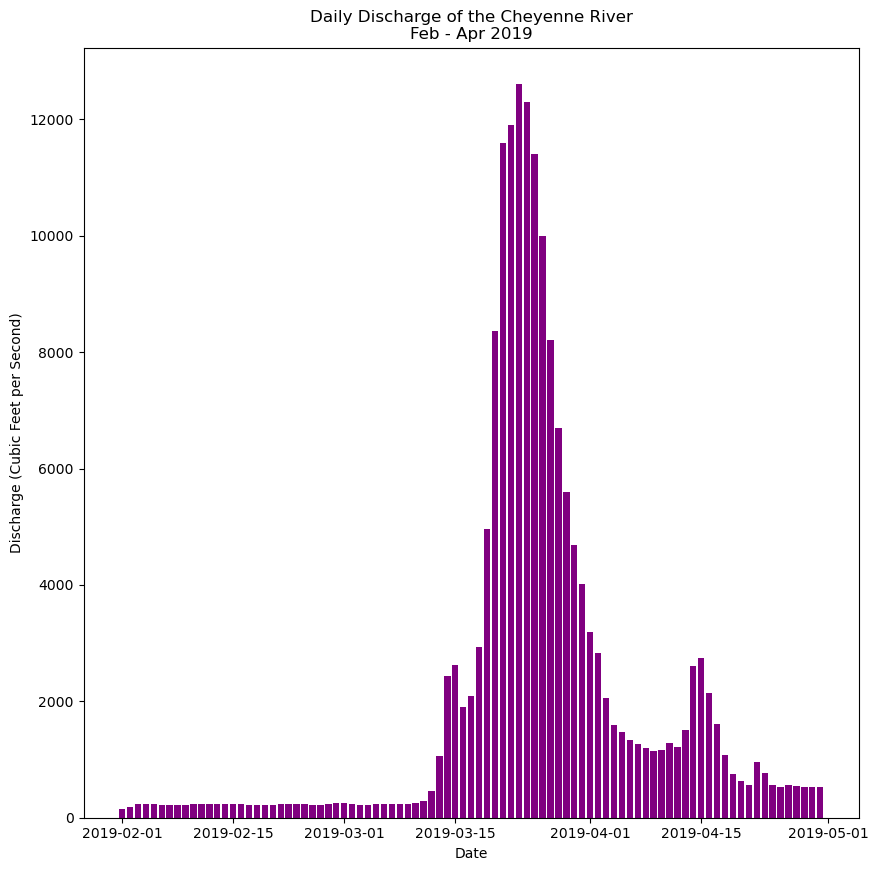

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(cheyenne_river_data_febapr_2019.index.values,
       cheyenne_river_data_febapr_2019['Discharge'],
       color='purple')
ax.set(xlabel="Date",
       ylabel="Discharge (Cubic Feet per Second)",
       title="Daily Discharge of the Cheyenne River\nFeb - Apr 2019")


You should be able to see the flood in your data going up above 12000 cfs at its peak. But how unusual is that really?

Let's start by plotting ALL the data. Then we'll use a return period **statistic** to quantify how unusual it was.

&#128187; In the cell below, plot the entire time series of streamflow data, without any parameters.

(0.0, 15000.0)

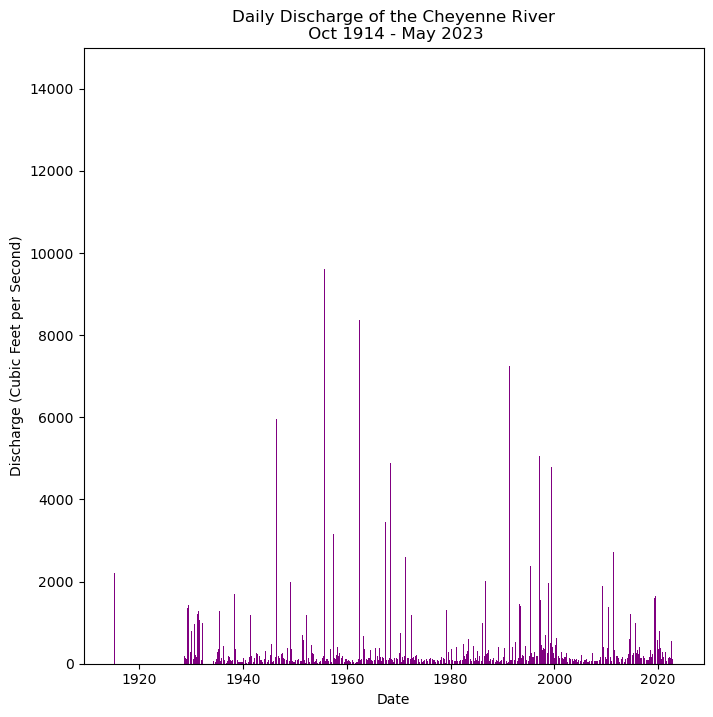

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(cheyenne_river_data.index.values,
       cheyenne_river_data['Discharge'],
       color='purple')
ax.set(xlabel="Date",
       ylabel="Discharge (Cubic Feet per Second)",
       title="Daily Discharge of the Cheyenne River\n Oct 1914 - May 2023")
plt.ylim(0,15000)


This plot looks a little fuzzy because it is trying to fit too many data points in a small area. One way to improve this is by **resampling** the data to **annual maxima**. That way we still get the same peak streamflows, but the computer will be able to plot all the values without overlapping.

> **Resampling** means changing the time interval between time series observations - in this case from daily to annual.

&#128214; Read about [different ways to resample time series data in your textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/resample-time-series-data-pandas-python/)

&#128214; You can use a [list of **offset aliases**](https://pandas.pydata.org/docs/dev/user_guide/timeseries.html#timeseries-offset-aliases) to look up how to specify the final dates. This list is pretty hard to find - you might want to bookmark it.

&#128187; In the cell below, select the streamflow column, and then resample it to get an annual maximum.

> Watch out for this gotcha - the test below is looking for a pandas `DataFrame`, but when we select a single column we get a pandas `Series` (a `DataFrame` is a collection of `Series`.) To get a `DataFrame` with a single column, use the syntax below with **two** square brackets:

```python
dataframe[['column_name']]
```

In [53]:
cheyenne_river_data_annual = cheyenne_river_data[['Discharge']].resample('YS').max()
cheyenne_river_data_annual

,Discharge
Date,
1914-01-01,1200.0
1915-01-01,31700.0
1916-01-01,NaN
1917-01-01,NaN
1918-01-01,NaN
...,...
2019-01-01,18400.0
2020-01-01,1800.0
2021-01-01,5170.0


In [54]:
ans_resample = _
resample_points = 0

# Answer should be a DataFrame
if isinstance(ans_resample, pd.DataFrame):
    print("\u2705 Great, you created a pandas DataFrame above")
    resample_points += 1
else:
    print("\u274C Oops - the cell above should have a DataFrame output.")

# Answer should have a Datetime index
if type(ans_resample.index) == pd.DatetimeIndex:
    print("\u2705 Your DataFrame has the date as the index, "
          "good job!")
    resample_points += 1
else:
    print("\u274C Your DataFrame does not have the date "
          "as the index.")

# Answer should include 89 days of data
if len(ans_resample)>=110:
    print("\u2705 Your DataFrame has the right number of years")
    resample_points += 2
else:
    print("\u274C Oops - did you resample your DataFrame to annual?")

# The mean of the streamflow Series should be 7888
if round(int(ans_resample.mean()), 0)==7888:
    print("\u2705 Your annual max streamflow DataFrame has the expected "
          "values in it, good job!")
    resample_points += 1
else:
    print("\u274C Your annual max streamflow DataFrame does not have the "
          "expected values in it.")

print("\u27A1 You received {} out of 5 points for subsetting the "
      "streamflow data.".format(
    resample_points))
resample_points

✅ Great, you created a pandas DataFrame above
✅ Your DataFrame has the date as the index, good job!
✅ Your DataFrame has the right number of years
✅ Your annual max streamflow DataFrame has the expected values in it, good job!
➡ You received 5 out of 5 points for subsetting the streamflow data.


/tmp/ipykernel_922/2745968858.py:28: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if round(int(ans_resample.mean()), 0)==7888:


5

&#128187; Plot your resampled data.

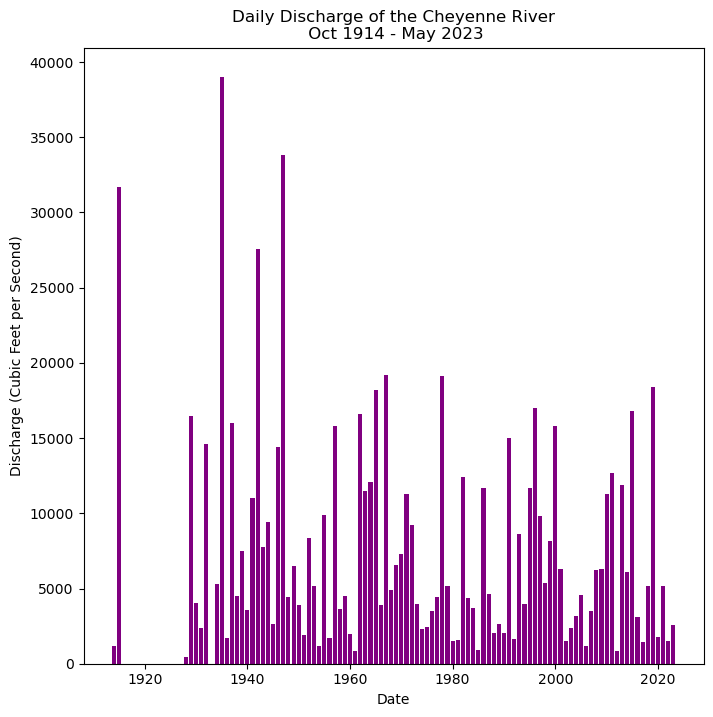

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(cheyenne_river_data_annual.index.year.values,
       cheyenne_river_data_annual['Discharge'],
       color='purple')
ax.set(xlabel="Date",
       ylabel="Discharge (Cubic Feet per Second)",
       title="Daily Discharge of the Cheyenne River\n Oct 1914 - May 2023")

plt.show()

In the cell below, write a headline and 2-3 sentence description of your plot. What do you estimate the return period was for the flood in 2019?

This graph shows the variation of discharge levels from the Cheyenne River throughout each year. I would estimate that the return period for the flood in 2019 was about four years. 

&#127798; In the cell below, calculate the exceedence probability and return period for each year of the **annual** data, and add them as columns to your DataFrame.

> HINT: pandas columns have a `rank` method, which you can use. BUT -- you will need to use the `ascending=False` parameter, since higher rank should be lower exceedence probability 

In [75]:
cheyenne_river_data_annual['exceed_prob'] = (
    cheyenne_river_data_annual.rank(ascending=False) ['Discharge'] / len(cheyenne_river_data_annual))
cheyenne_river_data_annual['return_period'] = 1 / cheyenne_river_data_annual.exceed_prob
print(round(cheyenne_river_data_annual.mean().product(), 0))

cheyenne_river_data_annual

20549.0


,Discharge,exceed_prob,return_period
Date,,,
1914-01-01,1200.0,0.836364,1.195652
1915-01-01,31700.0,0.027273,36.666667
1916-01-01,NaN,NaN,NaN
1917-01-01,NaN,NaN,NaN
1918-01-01,NaN,NaN,NaN
...,...,...,...
2019-01-01,18400.0,0.063636,15.714286
2020-01-01,1800.0,0.745455,1.341463
2021-01-01,5170.0,0.436364,2.291667


In [76]:
ans_return = _
return_points = 0

# Answer should be a DataFrame
if isinstance(ans_return, pd.DataFrame):
    print("\u2705 Great, you created a pandas dataframe above")
    return_points += 1
else:
    print("\u274C Oops - the cell above should have a DataFrame output.")

# Answer should have a Datetime index
if type(ans_return.index) == pd.DatetimeIndex:
    print("\u2705 Your DataFrame has the date as the index, "
          "good job!")
    return_points += 1
else:
    print("\u274C Your DataFrame does not have the date "
          "as the index.")

# Answer should include 110 years of data
if len(ans_return)==110:
    print("\u2705 Your DataFrame has the right number of days")
    return_points += 2
elif len(ans_return) > 110:
    print("\u274C Your DataFrame has too many years.")
else:
    print("\u274C Your DataFrame has too few years.")

# The value "hash" should be 20549.0
if round(ans_return.mean().product(), 0)==20549.0:
    print("\u2705 Your streamflow DataFrame has the expected values "
          "in it, good job!")
    return_points += 1
else:
    print("\u274C Your streamflow DataFrame does not have the "
          "expected values in it.")

print("\u27A1 You received {} out of 5 extra credit points for calculating the "
      "return period.".format(return_points))
return_points

✅ Great, you created a pandas dataframe above
✅ Your DataFrame has the date as the index, good job!
✅ Your DataFrame has the right number of days
✅ Your streamflow DataFrame has the expected values in it, good job!
➡ You received 5 out of 5 extra credit points for calculating the return period.


5

## Pep 8, and Does the Notebook Run?
In this cell, we will give you points for the following

1. PEP 8 is followed throughout the notebook (3 points)
3. The notebook runs from top to bottom without any editing (it is reproducible) (3 points)

0 b'# ---------------------------------- WARNING ----------------------------------------'
1 b'# Some of the data that you have obtained from this U.S. Geological Survey database'
2 b"# may not have received Director's approval. Any such data values are qualified"
3 b'# as provisional and are subject to revision. Provisional data are released on the'
4 b'# condition that neither the USGS nor the United States Government may be held liable'
5 b'# for any damages resulting from its use.'
6 b'#'
7 b'# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement'
8 b'#'
9 b'# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output'
28 b'agency_cd\tsite_no\tdatetime\t155355_00060_00003\t155355_00060_00003_cd'
29 b'5s\t15s\t20d\t14n\t10s'
30 b'USGS\t05545750\t1993-09-30\t1110\tA'
31 b'USGS\t05545750\t1993-10-01\t769\tA'
32 b'USGS\t05545750\t1993-10-02\t795\tA'
33 b'USGS\t05545750\t1993-10-03\t803\tA'
34 b'USGS\t05545750\t1993-10-04\t77

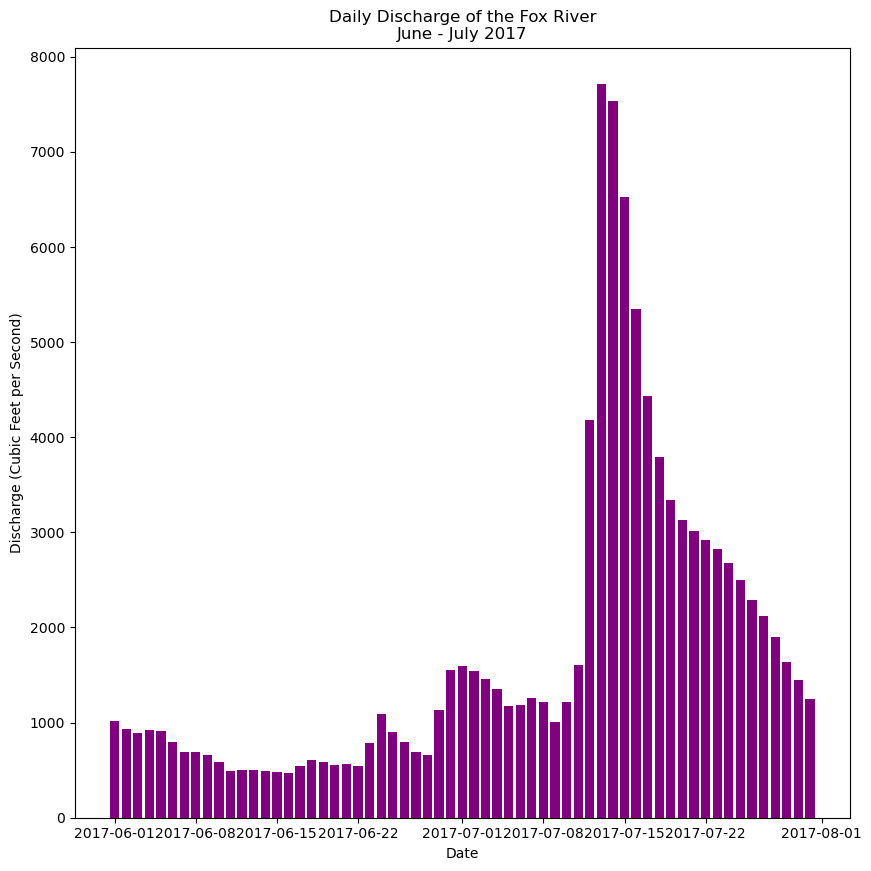

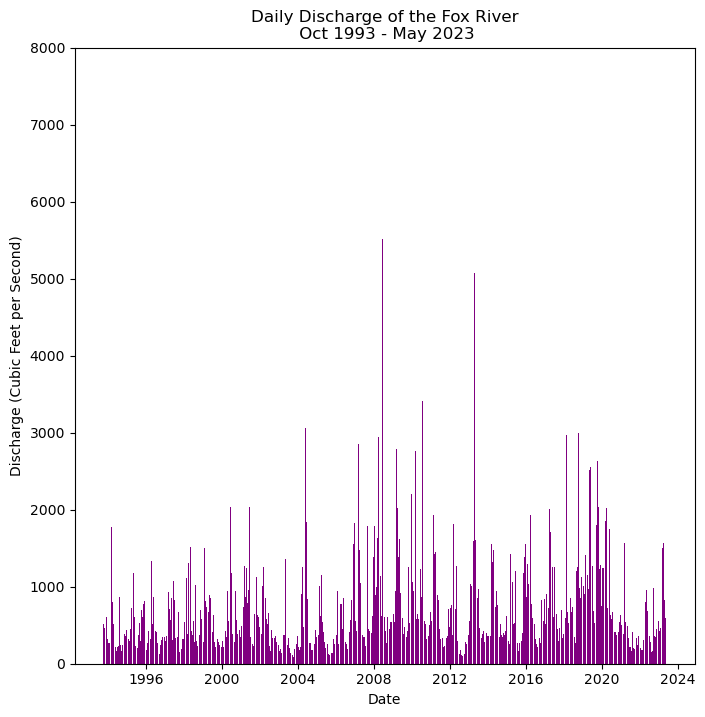

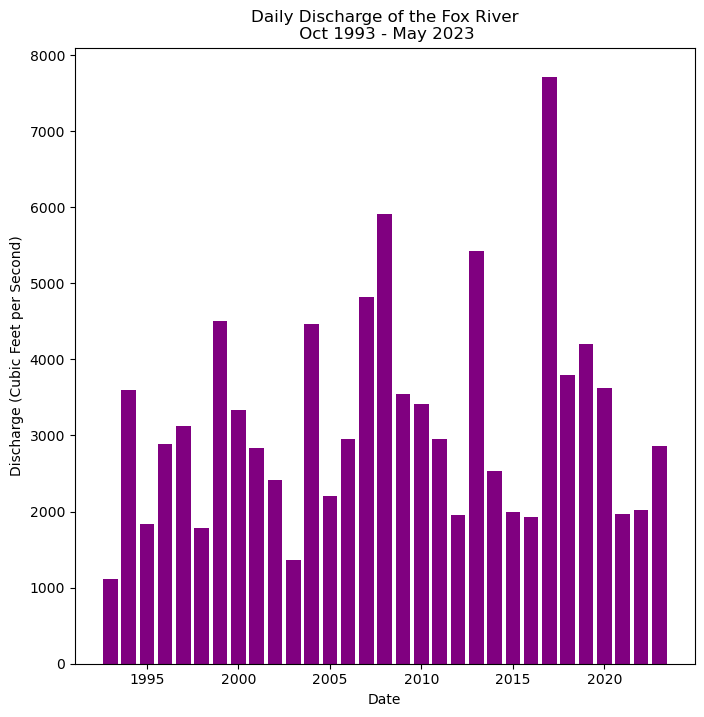

6644.0


,Discharge,exceed_prob,return_period
Date,,,
1993-01-01,1110.0,1.000000,1.000000
1994-01-01,3600.0,0.322581,3.100000
1995-01-01,1830.0,0.903226,1.107143
1996-01-01,2890.0,0.548387,1.823529
1997-01-01,3130.0,0.451613,2.214286
1998-01-01,1790.0,0.935484,1.068966
1999-01-01,4510.0,0.161290,6.200000
2000-01-01,3330.0,0.419355,2.384615
2001-01-01,2840.0,0.612903,1.631579


In [15]:
# Importing packages
import os
import pathlib
import subprocess

from io import BytesIO

import folium
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Download the data
fox_river_url = ('https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format'
                 '=rdb&site_no=05545750&legacy=&referred_module=sw&period'
                 '=&begin_date=1914-10-01&end_date=2023-06-01')
    

# Download data using a GET HTTP Request
d = requests.get(fox_river_url)
d

#Look at raw data 
for i, line in enumerate(d.content.splitlines()[:10]):
    print(i, line)

# Take a look at the data. What got downloaded?
for i, line in enumerate(d.content.splitlines()[:35]):
    if not line.startswith(b'#'):
        print(i, line)

# Import data with pandas 
fox_river_data = pd.read_csv(
    BytesIO(d.content),
    comment='#',
    delimiter='\t', 
    skiprows=[28, 29],
    names=["Agency", "Site ID", "Date", "Discharge", "Code"],
    index_col='Date',
    parse_dates=True,
) 
fox_river_data

# Run through values in the streamflow column one by one
for q in fox_river_data:
    try: 
        float(q)
    except:
        print(q)
        break

# Reimport data indicating NA values 
fox_river_data = pd.read_csv(
    BytesIO(d.content),
    comment='#',
    delimiter='\t', 
    skiprows=[28, 29],
    names=["Agency", "Site ID", "Date", "Discharge", "Code"],
    index_col='Date',
    parse_dates=True,
    na_values= 'Ice'
) 
fox_river_data

# Subset the stream discharge value 
fox_river_dat_junejuly_2017 = fox_river_data['2017-06':'2017-07']
fox_river_dat_junejuly_2017

# Plot the subsetted data 
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(fox_river_dat_junejuly_2017.index.values,
       fox_river_dat_junejuly_2017['Discharge'],
       color='purple')
ax.set(xlabel="Date",
       ylabel="Discharge (Cubic Feet per Second)",
       title="Daily Discharge of the Fox River\nJune - July 2017")

# Plot all data 
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(fox_river_data.index.values,
       fox_river_data['Discharge'],
       color='purple')
ax.set(xlabel="Date",
       ylabel="Discharge (Cubic Feet per Second)",
       title="Daily Discharge of the Fox River\n Oct 1993 - May 2023")
plt.ylim(0,8000)

# Select the streamflow column, and then resample it to get an annual maximum
fox_river_data_annual = fox_river_data[['Discharge']].resample('YS').max()
fox_river_data_annual

# Plot resampled data 
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(fox_river_data_annual.index.year.values,
       fox_river_data_annual['Discharge'],
       color='purple')
ax.set(xlabel="Date",
       ylabel="Discharge (Cubic Feet per Second)",
       title="Daily Discharge of the Fox River\n Oct 1993 - May 2023")

plt.show()

# Calculate the exceedence probability and return period for each year  
fox_river_data_annual['exceed_prob'] = (
    fox_river_data_annual.rank(ascending=False) ['Discharge'] / len(fox_river_data_annual))
fox_river_data_annual['return_period'] = 1 / fox_river_data_annual.exceed_prob
print(round(fox_river_data_annual.mean().product(), 0))

fox_river_data_annual